<a href="https://colab.research.google.com/github/gencross/NewtonGroup1/blob/main/Denali_Newtons_Basin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from PIL import Image
from numpy.polynomial.polynomial import polyder
from numpy.polynomial.polynomial import polyval
from numpy.polynomial.polynomial import polyroots
import pandas as pd

In [3]:
# a couple polynomials and their roots for reference. Leading up to 3rd order polynomials
def f1(x):
  '''
  x^3-2x^2-11x+12
  has roots -3, 1, 4
  '''
  return((x**3) - 2*(x**2) - (11*x) + 12)

def f1p(x):
  return(3*(x**2) - (4*x) - 11)

def f2(x):
  '''
  x^2+4x-12
  has roots 2, -6
  '''
  return((x**2) + (4*x) - 12)

def f2p(x):
  return((2*x) + 4)





In [4]:

def derivative(p):
  '''Takes a list as input. The list represents the coefficients of a polynomial
  with degree equal to 1+length of list. Returns a list representing the 
  derivative of that polynomial.
  '''
  d = p
  for n in range(1,len(p)):
    d[n-1] = d[n] * n
  d[-1] = 0
  return d

derivative([1,2,3,4])

[2, 6, 12, 0]

In [5]:
def newton(P, start, steps=100):
  root = start
  P_deriv = polyder(P)
  for i in range(steps):
    root = root - (polyval(root,P) / polyval(root,P_deriv))
  return root

In [6]:
def comp_array(rplus, rmin, iplus, imin, res):
  #array parameters
  real_min = rmin
  real_max = rmax
  imag_min = imin
  imag_max = iplus
  resolution = res

  #array creation
  x_array = np.linspace(real_min,real_max, resolution * (real_max-real_min) )
  y_array = np.linspace(imag_min,imag_max, resolution * (imag_max-imag_min) )

  c_array = np.add.outer(x_array,  y_array*1j)

  c_shape=c_array.shape()
  z_array=np.zeros(c_shape)


In [15]:
real_min = -100
real_max = 100
imag_min = -100
imag_max = 100
resolution = 10
polynomial = [1, 2, 2, 1]

x_array = np.linspace(real_min,real_max, resolution * (real_max-real_min) )
y_array = np.linspace(imag_min,imag_max, resolution * (imag_max-imag_min) )

c_array = np.add.outer(x_array,y_array*1j) #1j is the complex number we usually call i.
I = newton(polynomial, c_array)
polyroots(polynomial)

array([-1. +0.j       , -0.5-0.8660254j, -0.5+0.8660254j])

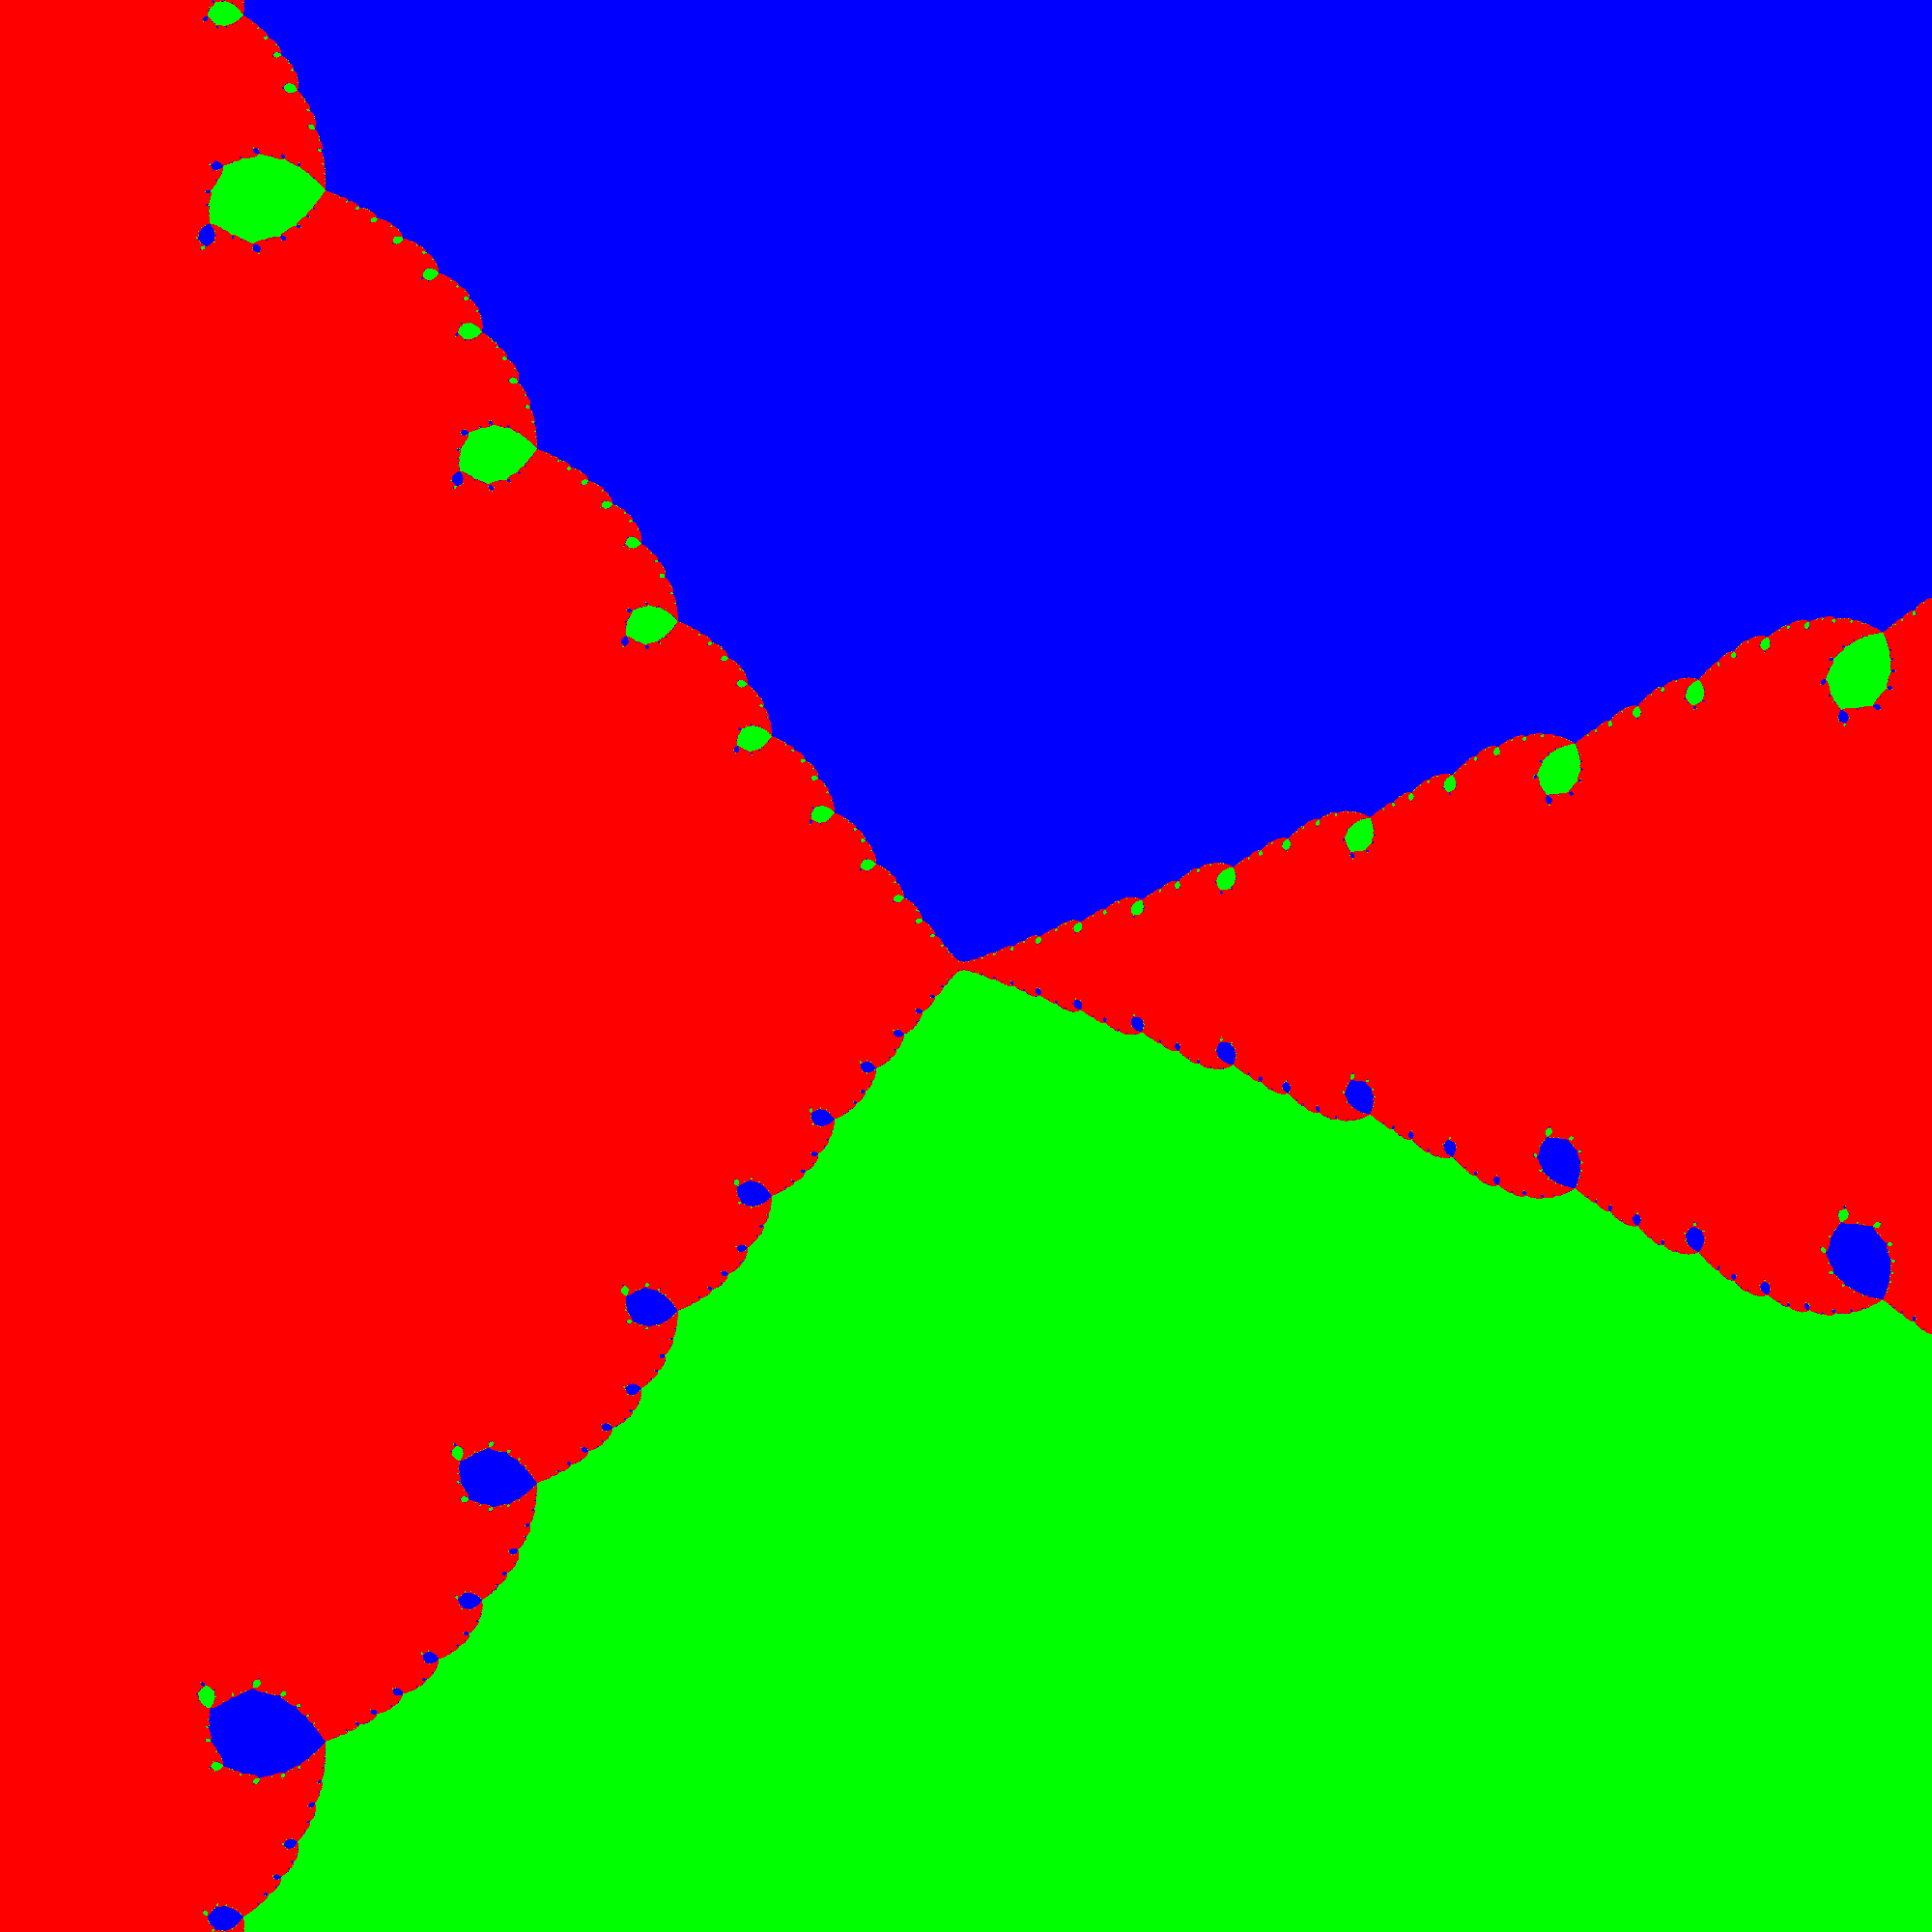

In [16]:
real_size=resolution * (real_max - real_min)
imag_size=resolution * (imag_max - imag_min)
fractal = np.zeros((real_size, imag_size, 3), dtype=np.uint8)
for x in range(real_size):
  for y in range(imag_size):
    if I[x,y] == -1. +0.j:
      fractal[y,x] = [255,0,0] # Red = x, Green = 128, Blue = 0
    if I[x,y].imag > 0:
      fractal[y,x] = [0,255,0]
    if I[x,y].imag < 0:
      fractal[y,x] = [0,0,255]

img = Image.fromarray(fractal) # Create an image from the array.
display(img)

In [17]:
from google.colab import files
img.save('fractal.png')
files.download('fractal.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>